#Predicción de Ventas en una eCommerce (2025)
dataset: https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop/data

##II.	SELECCION Y PREPROCESAMIENTO DEL DATASET


### II. A EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('/content/2020-Jan.csv')

In [3]:
df_eda = df.copy()

print("1. INFORMACIÓN GENERAL DEL DATASET")

print("="*50)
print(f"Dimensiones del dataset: {df_eda.shape}")
print(f"Número de filas: {df_eda.shape[0]:,}")
print(f"Número de columnas: {df_eda.shape[1]}")
print("\nPrimeras 5 filas:")
print(df_eda.head())
print("\nInformación general:")
print(df_eda.info())
print("\nTipos de datos:")
print(df_eda.dtypes)
print("\n")

1. INFORMACIÓN GENERAL DEL DATASET
Dimensiones del dataset: (490637, 9)
Número de filas: 490,637
Número de columnas: 9

Primeras 5 filas:
                event_time event_type  product_id          category_id  \
0  2020-01-01 00:00:00 UTC       view     5809910  1602943681873052386   
1  2020-01-01 00:00:09 UTC       view     5812943  1487580012121948301   
2  2020-01-01 00:00:19 UTC       view     5798924  1783999068867920626   
3  2020-01-01 00:00:24 UTC       view     5793052  1487580005754995573   
4  2020-01-01 00:00:25 UTC       view     5899926  2115334439910245200   

  category_code     brand  price    user_id  \
0           NaN   grattol   5.24  595414620   
1           NaN  kinetics   3.97  595414640   
2           NaN    zinger   3.97  595412617   
3           NaN       NaN   4.92  420652863   
4           NaN       NaN   3.92  484071203   

                           user_session  
0  4adb70bb-edbd-4981-b60f-a05bfd32683a  
1  c8c5205d-be43-4f1d-aa56-4828b8151c8a  
2  46a50

In [4]:
print("2. EVALUACIÓN DE LA CALIDAD DE LOS DATOS")
print("="*50)

# Valores faltantes
print("Valores faltantes por columna:")
missing_data = df_eda.isnull().sum()
missing_percent = (missing_data / len(df_eda)) * 100
missing_df = pd.DataFrame({
    'Valores Faltantes': missing_data,
    'Porcentaje': missing_percent
}).sort_values('Valores Faltantes', ascending=False)
print(missing_df)


2. EVALUACIÓN DE LA CALIDAD DE LOS DATOS
Valores faltantes por columna:
               Valores Faltantes  Porcentaje
category_code             482584   98.358664
brand                     221235   45.091381
user_session                  80    0.016305
event_time                     0    0.000000
event_type                     0    0.000000
category_id                    0    0.000000
product_id                     0    0.000000
price                          0    0.000000
user_id                        0    0.000000


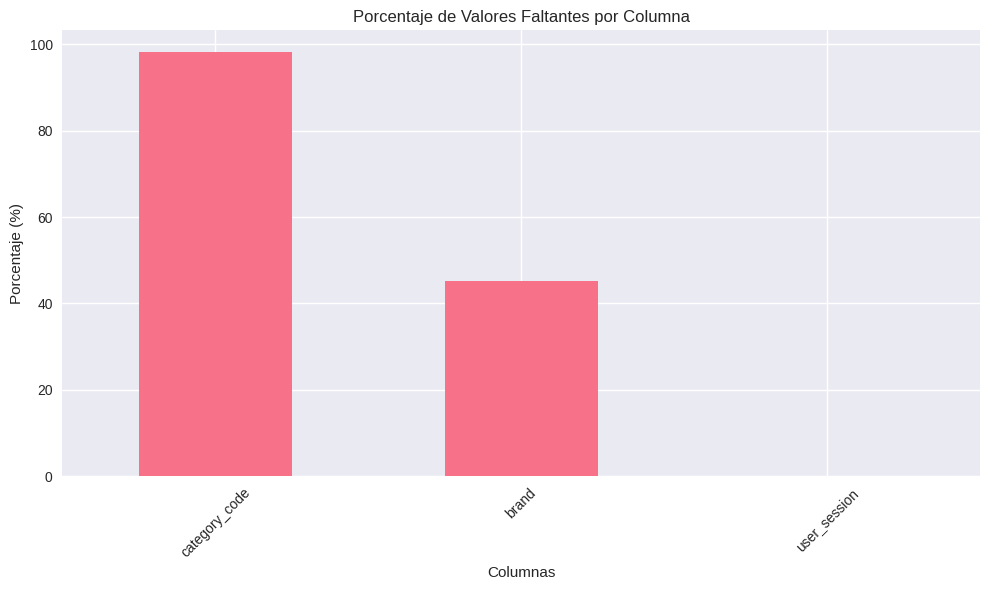

In [5]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

plt.figure(figsize=(10, 6))
missing_df[missing_df['Valores Faltantes'] > 0]['Porcentaje'].plot(kind='bar')
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Columnas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Duplicados
duplicados = df_eda.duplicated().sum()
print(f"\nRegistros duplicados: {duplicados}")



Registros duplicados: 28541


In [7]:
# Valores únicos por columna
print("\nNúmero de valores únicos por columna:")
for col in df_eda.columns:
    print(f"{col}: {df_eda[col].nunique():,} valores únicos")

print("\n")


Número de valores únicos por columna:
event_time: 239,954 valores únicos
event_type: 4 valores únicos
product_id: 31,943 valores únicos
category_id: 433 valores únicos
category_code: 10 valores únicos
brand: 235 valores únicos
price: 1,800 valores únicos
user_id: 61,465 valores únicos
user_session: 111,625 valores únicos




In [8]:
# 3. CONVERSIÓN DE TIPOS DE DATOS
print("3. PROCESAMIENTO DE DATOS")
print("="*50)

# Convertir event_time a datetime, manejando errores
df_eda['event_time'] = pd.to_datetime(df_eda['event_time'], errors='coerce')

# Extraer componentes de fecha (los valores NaT resultarán en NaT para estos componentes)
df_eda['date'] = df_eda['event_time'].dt.date
df_eda['hour'] = df_eda['event_time'].dt.hour
df_eda['day_of_week'] = df_eda['event_time'].dt.day_name()
df_eda['month'] = df_eda['event_time'].dt.month

print("Datos procesados correctamente\n")

3. PROCESAMIENTO DE DATOS
Datos procesados correctamente



In [9]:
df_eda.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date,hour,day_of_week,month
0,2020-01-01 00:00:00+00:00,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,2020-01-01,0,Wednesday,1
1,2020-01-01 00:00:09+00:00,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,2020-01-01,0,Wednesday,1
2,2020-01-01 00:00:19+00:00,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,2020-01-01,0,Wednesday,1
3,2020-01-01 00:00:24+00:00,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,2020-01-01,0,Wednesday,1
4,2020-01-01 00:00:25+00:00,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb,2020-01-01,0,Wednesday,1


In [10]:
# 4. ESTADÍSTICAS DESCRIPTIVAS
print("4. ESTADÍSTICAS DESCRIPTIVAS")
print("="*50)

# Variables numéricas
numeric_cols = ['price']
print("Estadísticas para variables numéricas:")
print(df_eda[numeric_cols].describe())

4. ESTADÍSTICAS DESCRIPTIVAS
Estadísticas para variables numéricas:
               price
count  490637.000000
mean        9.347440
std        20.516505
min       -79.370000
25%         2.380000
50%         4.130000
75%         7.460000
max       327.780000


In [11]:
# Variables categóricas principales
categorical_cols = ['event_type', 'brand', 'category_code']
print("\nDistribución de variables categóricas principales:")
for col in categorical_cols:
    if col in df_eda.columns:
        print(f"\n{col}:")
        print(df_eda[col].value_counts().head(10))

print("\n")


Distribución de variables categóricas principales:

event_type:
event_type
view                234890
cart                131163
remove_from_cart     99066
purchase             25518
Name: count, dtype: int64

brand:
brand
runail       36294
grattol      21540
irisk        21431
masura       13083
kapous       10622
estel         9275
ingarden      9254
jessnail      8667
bluesky       7758
bpw.style     6071
Name: count, dtype: int64

category_code:
category_code
appliances.environment.vacuum             3775
apparel.glove                             1395
stationery.cartrige                       1001
furniture.living_room.cabinet              558
accessories.bag                            532
furniture.bathroom.bath                    529
appliances.personal.hair_cutter            154
accessories.cosmetic_bag                    89
appliances.environment.air_conditioner      19
furniture.living_room.chair                  1
Name: count, dtype: int64




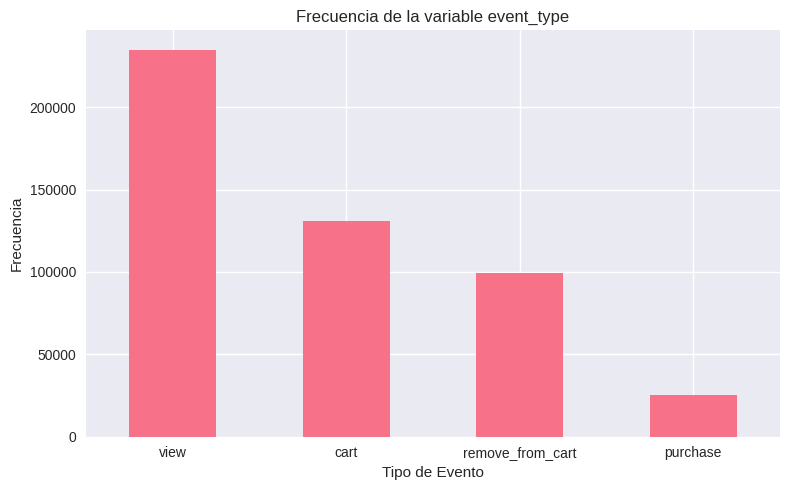

In [12]:
# Visualización de la frecuencia de 'event_type'
plt.figure(figsize=(8, 5))
df['event_type'].value_counts().plot(kind='bar')
plt.title('Frecuencia de la variable event_type')
plt.xlabel('Tipo de Evento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
# 5. ANÁLISIS DE LA VARIABLE PRECIO
print("5. ANÁLISIS DETALLADO DE PRECIOS")
print("="*50)

# Filtrar precios válidos (no nulos y mayores a 0)
valid_prices = df_eda[df_eda['price'].notna() & (df_eda['price'] > 0)]

print(f"Registros con precios válidos: {len(valid_prices):,} ({len(valid_prices)/len(df_eda)*100:.1f}%)")
print("\nEstadísticas de precios:")
print(f"Media: ${valid_prices['price'].mean():.2f}")
print(f"Mediana: ${valid_prices['price'].median():.2f}")
print(f"Desviación estándar: ${valid_prices['price'].std():.2f}")
print(f"Precio mínimo: ${valid_prices['price'].min():.2f}")
print(f"Precio máximo: ${valid_prices['price'].max():.2f}")

5. ANÁLISIS DETALLADO DE PRECIOS
Registros con precios válidos: 490,414 (100.0%)

Estadísticas de precios:
Media: $9.35
Mediana: $4.14
Desviación estándar: $20.52
Precio mínimo: $0.05
Precio máximo: $327.78


In [14]:
# Percentiles
percentiles = [25, 50, 75, 90, 95, 99]
print(f"\nPercentiles de precios:")
for p in percentiles:
    print(f"P{p}: ${valid_prices['price'].quantile(p/100):.2f}")


Percentiles de precios:
P25: $2.38
P50: $4.14
P75: $7.46
P90: $16.67
P95: $34.92
P99: $111.98


In [15]:
# 6. IDENTIFICACIÓN DE VALORES ATÍPICOS
print("\n6. IDENTIFICACIÓN DE VALORES ATÍPICOS")
print("="*50)

# Método IQR para precios
Q1 = valid_prices['price'].quantile(0.25)
Q3 = valid_prices['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = valid_prices[(valid_prices['price'] < lower_bound) | (valid_prices['price'] > upper_bound)]
print(f"Valores atípicos en precios (método IQR): {len(outliers):,} ({len(outliers)/len(valid_prices)*100:.1f}%)")
print(f"Límite inferior: ${lower_bound:.2f}")
print(f"Límite superior: ${upper_bound:.2f}")


6. IDENTIFICACIÓN DE VALORES ATÍPICOS
Valores atípicos en precios (método IQR): 57,175 (11.7%)
Límite inferior: $-5.24
Límite superior: $15.08


In [16]:
# Z-score para identificar outliers extremos
z_scores = np.abs((valid_prices['price'] - valid_prices['price'].mean()) / valid_prices['price'].std())
extreme_outliers = valid_prices[z_scores > 3]
print(f"Valores atípicos extremos (Z-score > 3): {len(extreme_outliers):,}")

print("\n")

Valores atípicos extremos (Z-score > 3): 10,610




7. VISUALIZACIONES


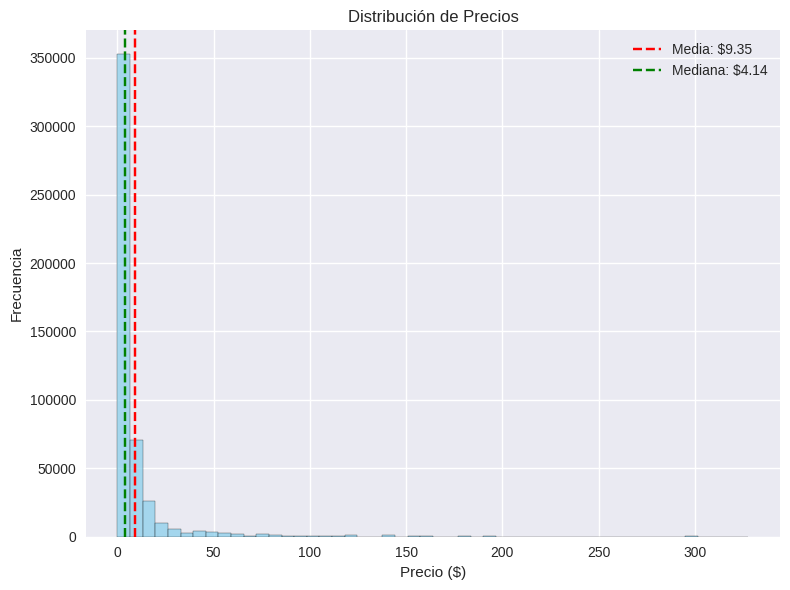

In [17]:
# 7. VISUALIZACIONES
print("7. VISUALIZACIONES")
print("="*50)

# 7.1 Distribución de precios
plt.figure(figsize=(8,6))
plt.hist(valid_prices['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(valid_prices['price'].mean(), color='red', linestyle='--', label=f'Media: ${valid_prices["price"].mean():.2f}')
plt.axvline(valid_prices['price'].median(), color='green', linestyle='--', label=f'Mediana: ${valid_prices["price"].median():.2f}')
plt.title('Distribución de Precios')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

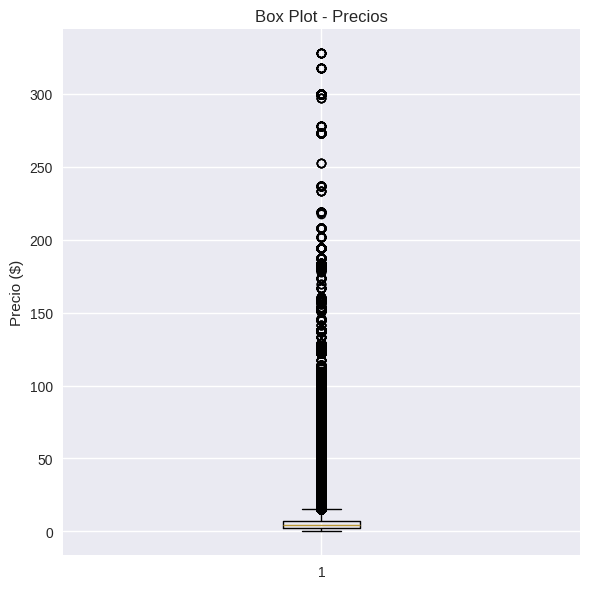

In [18]:
# 7.2 Box plot de precios
plt.figure(figsize=(6,6))
plt.boxplot(valid_prices['price'])
plt.title('Box Plot - Precios')
plt.ylabel('Precio ($)')
plt.tight_layout()
plt.show()

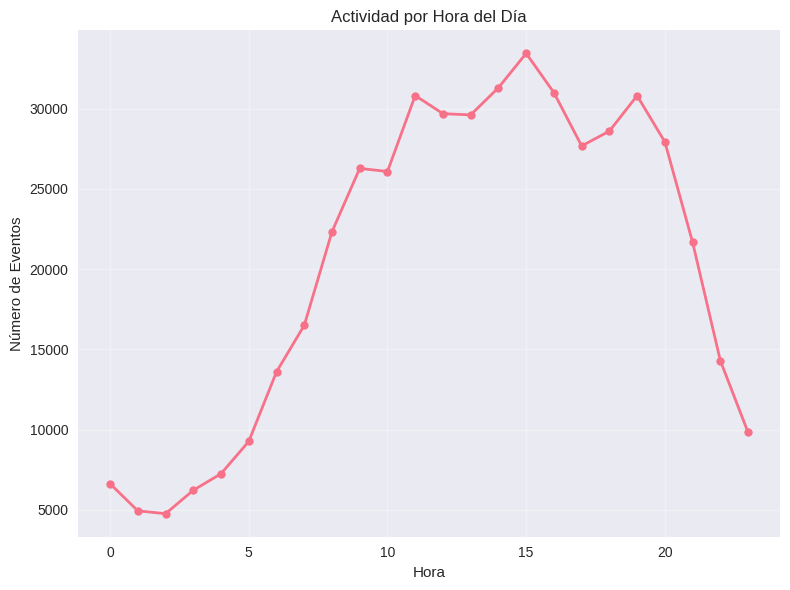

In [19]:
# 7.4 Actividad por hora
plt.figure(figsize=(8,6))
hourly_activity = df_eda.groupby('hour').size()
plt.plot(hourly_activity.index, hourly_activity.values, marker='o', linewidth=2, markersize=6)
plt.title('Actividad por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

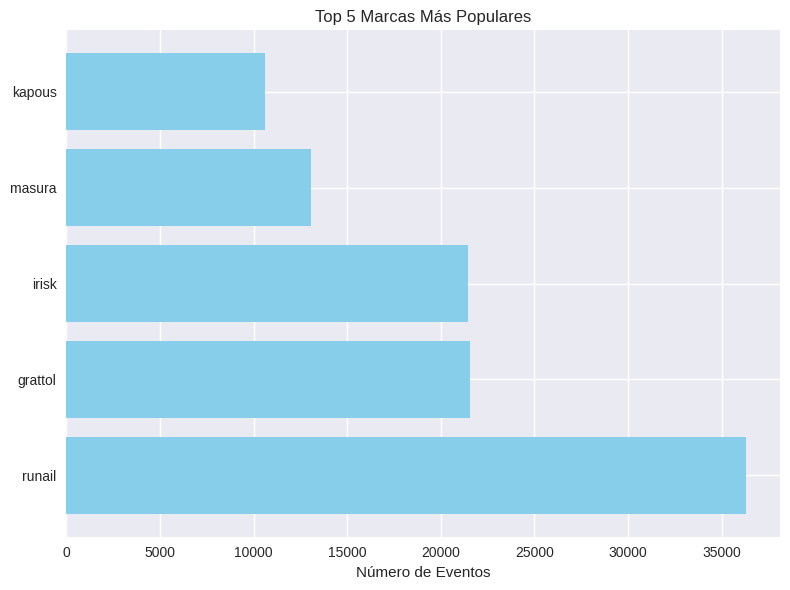

In [20]:
# 7.5 Top 10 marcas más populares
plt.figure(figsize=(8,6))
top_brands = df_eda[df_eda['brand'].notna()]['brand'].value_counts().head(5)
plt.barh(range(len(top_brands)), top_brands.values, color='skyblue')
plt.yticks(range(len(top_brands)), top_brands.index)
plt.title('Top 5 Marcas Más Populares')
plt.xlabel('Número de Eventos')
plt.tight_layout()
plt.show()

In [21]:
# 9. ANÁLISIS TEMPORAL
print("9. ANÁLISIS TEMPORAL")
print("="*50)

# Actividad diaria
daily_activity = df_eda.groupby('date').size()
print(f"Período de datos: {daily_activity.index.min()} a {daily_activity.index.max()}")
print(f"Actividad diaria promedio: {daily_activity.mean():.0f} eventos")
print(f"Día más activo: {daily_activity.idxmax()} ({daily_activity.max():,} eventos)")
print(f"Día menos activo: {daily_activity.idxmin()} ({daily_activity.min():,} eventos)")


9. ANÁLISIS TEMPORAL
Período de datos: 2020-01-01 a 2020-01-05
Actividad diaria promedio: 98127 eventos
Día más activo: 2020-01-03 (116,893 eventos)
Día menos activo: 2020-01-05 (73,030 eventos)


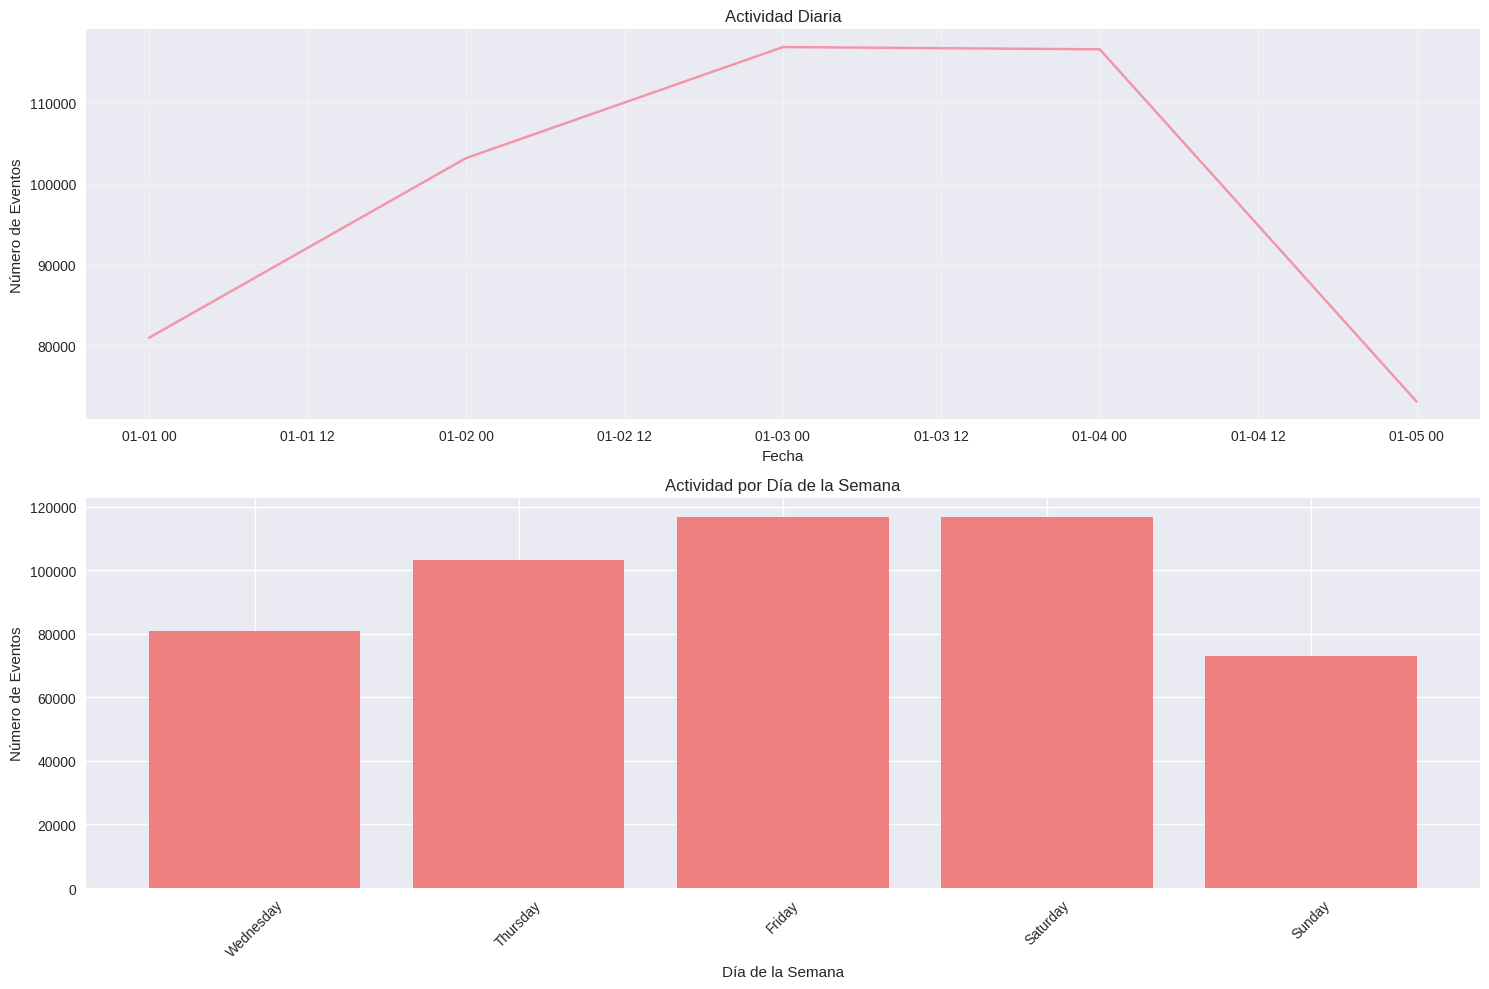

In [22]:
# Visualización de actividad temporal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Actividad diaria
ax1.plot(daily_activity.index, daily_activity.values, alpha=0.7)
ax1.set_title('Actividad Diaria')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Número de Eventos')
ax1.grid(True, alpha=0.3)

# Actividad por día de la semana
weekly_activity = df_eda.groupby('day_of_week').size()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_activity = weekly_activity.reindex(day_order)

ax2.bar(weekly_activity.index, weekly_activity.values, color='lightcoral')
ax2.set_title('Actividad por Día de la Semana')
ax2.set_xlabel('Día de la Semana')
ax2.set_ylabel('Número de Eventos')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

###II B Limpieza de datos

In [23]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a
1,2020-01-01 00:00:09 UTC,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a
2,2020-01-01 00:00:19 UTC,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3
3,2020-01-01 00:00:24 UTC,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711
4,2020-01-01 00:00:25 UTC,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb


In [24]:
print("Dataset original:")
print(f"Shape: {df.shape}")
print(f"Duplicados: {df.duplicated().sum()}")

Dataset original:
Shape: (490637, 9)
Duplicados: 28541


In [25]:
def limpieza_datos(df):
    """
    Realiza la limpieza inicial del dataset
    """
    print("=== LIMPIEZA DE DATOS ===")

    # 1. Eliminar duplicados
    print(f"Duplicados encontrados: {df.duplicated().sum()}")
    df_clean = df.drop_duplicates()

    # 2. Convertir event_time a datetime
    df_clean['event_time'] = pd.to_datetime(df_clean['event_time'], errors='coerce')

    # 3. Limpiar precios negativos (parecen ser errores)
    print(f"Precios negativos: {(df_clean['price'] < 0).sum()}")
    df_clean = df_clean[df_clean['price'] >= 0]  # Eliminar precios negativos

    # 4. Eliminar filas donde user_id es nulo
    df_clean = df_clean.dropna(subset=['user_id'])

    # 5. Validar event_types
    valid_events = ['view', 'cart', 'remove_from_cart', 'purchase']
    df_clean = df_clean[df_clean['event_type'].isin(valid_events)]

    print(f"Shape después de limpieza: {df_clean.shape}")
    return df_clean

df_clean = limpieza_datos(df);

=== LIMPIEZA DE DATOS ===
Duplicados encontrados: 28541
Precios negativos: 5
Shape después de limpieza: (462091, 9)


/tmp/ipython-input-2923314660.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['event_time'] = pd.to_datetime(df_clean['event_time'], errors='coerce')


In [26]:
# Ingenieria de caracteristicas

def feature_engineering(df):
    """
    Crear nuevas características a partir de las existentes
    """
    print("=== FEATURE ENGINEERING ===")

    df_fe = df.copy()

    # Características temporales
    df_fe['hour'] = df_fe['event_time'].dt.hour
    df_fe['day_of_week'] = df_fe['event_time'].dt.dayofweek
    df_fe['day_of_month'] = df_fe['event_time'].dt.day
    df_fe['month'] = df_fe['event_time'].dt.month
    df_fe['is_weekend'] = (df_fe['day_of_week'] >= 5).astype(int)

    # Características de precio
    df_fe['price_log'] = np.log1p(df_fe['price'])  # Log para normalizar distribución



    return df_fe

df_fe = feature_engineering(df_clean)
df_fe.head()

=== FEATURE ENGINEERING ===


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,day_of_week,day_of_month,month,is_weekend,price_log
0,2020-01-01 00:00:00+00:00,view,5809910,1602943681873052386,NaN,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0,2,1,1,0,1.830980
1,2020-01-01 00:00:09+00:00,view,5812943,1487580012121948301,NaN,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0,2,1,1,0,1.603420
2,2020-01-01 00:00:19+00:00,view,5798924,1783999068867920626,NaN,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0,2,1,1,0,1.603420
3,2020-01-01 00:00:24+00:00,view,5793052,1487580005754995573,NaN,NaN,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,0,2,1,1,0,1.778336
4,2020-01-01 00:00:25+00:00,view,5899926,2115334439910245200,NaN,NaN,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb,0,2,1,1,0,1.593309


In [27]:
#inputacion valores faltantes

def imputacion_valores_faltantes(df):
    """
    Imputa valores faltantes usando diferentes estrategias
    """
    print("=== IMPUTACIÓN DE VALORES FALTANTES ===")

    df_imputed = df.copy()

    # 1. BRAND: Imputar con 'unknown' o usar KNN
    print(f"Valores faltantes en brand: {df_imputed['brand'].isnull().sum()}")
    df_imputed['brand'] = df_imputed['brand'].fillna('unknown_brand')

    # 2. CATEGORY_CODE: Usar category_id para imputar cuando sea posible
    # Crear un mapeo de category_id -> category_code más frecuente
    category_mapping = df_imputed.groupby('category_id')['category_code'].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown_category'
    ).to_dict()

    # Imputar category_code usando el mapeo
    mask_null = df_imputed['category_code'].isnull()
    df_imputed.loc[mask_null, 'category_code'] = df_imputed.loc[mask_null, 'category_id'].map(category_mapping)

    # Rellenar los que siguen siendo nulos
    df_imputed['category_code'] = df_imputed['category_code'].fillna('unknown_category')

    # 3. USER_SESSION: Imputar con 'unknown_session'
    df_imputed['user_session'] = df_imputed['user_session'].fillna('unknown_session')

    # 4. PRICE: Imputar usando la mediana por category_id
    price_imputer = df_imputed.groupby('category_id')['price'].median().to_dict()
    mask_price_null = df_imputed['price'].isnull()
    df_imputed.loc[mask_price_null, 'price'] = df_imputed.loc[mask_price_null, 'category_id'].map(price_imputer)

    # Si aún hay nulos en price, usar la mediana general
    df_imputed['price'] = df_imputed['price'].fillna(df_imputed['price'].median())

    print("Valores faltantes después de imputación:")
    print(df_imputed.isnull().sum())

    return df_imputed

df_imputed = imputacion_valores_faltantes(df_fe)

=== IMPUTACIÓN DE VALORES FALTANTES ===
Valores faltantes en brand: 207649
Valores faltantes después de imputación:
event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
hour             0
day_of_week      0
day_of_month     0
month            0
is_weekend       0
price_log        0
dtype: int64


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:

# codificacion variables categoricas

def codificacion_variables(df):
    """
    Codifica variables categóricas usando diferentes técnicas
    """
    print("=== CODIFICACIÓN DE VARIABLES ===")

    df_encoded = df.copy()

    # 1. Label Encoding para variables ordinales o con muchas categorías
    le_columns = ['brand', 'category_code', 'user_session']
    label_encoders = {}

    for col in le_columns:
        if col in df_encoded.columns:
            le = LabelEncoder()
            df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col].astype(str))
            label_encoders[col] = le

    # 2. One-Hot Encoding para event_type (variable objetivo en formato categórico)
    event_type_dummies = pd.get_dummies(df_encoded['event_type'], prefix='event')
    df_encoded = pd.concat([df_encoded, event_type_dummies], axis=1)

    # 3. Frequency Encoding para variables con alta cardinalidad
    for col in ['product_id', 'category_id', 'user_id']:
        freq_map = df_encoded[col].value_counts().to_dict()
        df_encoded[f'{col}_frequency'] = df_encoded[col].map(freq_map)

    # 4. Target Encoding para variables categóricas vs purchase
    # Calcular la tasa de compra por categoría
    purchase_rate_brand = df_encoded.groupby('brand')['event_purchase'].mean()
    purchase_rate_category = df_encoded.groupby('category_code')['event_purchase'].mean()

    df_encoded['brand_purchase_rate'] = df_encoded['brand'].map(purchase_rate_brand)
    df_encoded['category_purchase_rate'] = df_encoded['category_code'].map(purchase_rate_category)

    return df_encoded, label_encoders

df_encoded, label_encoders = codificacion_variables(df_imputed)


=== CODIFICACIÓN DE VARIABLES ===


In [30]:
df_encoded.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,...,user_session_encoded,event_cart,event_purchase,event_remove_from_cart,event_view,product_id_frequency,category_id_frequency,user_id_frequency,brand_purchase_rate,category_purchase_rate
0,2020-01-01 00:00:00+00:00,view,5809910,1602943681873052386,unknown_category,grattol,5.24,595414620,4adb70bb-edbd-4981-b60f-a05bfd32683a,0,...,32674,False,False,False,True,4347,15329,1,0.057677,0.055373
1,2020-01-01 00:00:09+00:00,view,5812943,1487580012121948301,unknown_category,kinetics,3.97,595414640,c8c5205d-be43-4f1d-aa56-4828b8151c8a,0,...,87510,False,False,False,True,7,279,1,0.039460,0.055373
2,2020-01-01 00:00:19+00:00,view,5798924,1783999068867920626,unknown_category,zinger,3.97,595412617,46a5010f-bd69-4fbe-a00d-bb17aa7b46f3,0,...,30797,False,False,False,True,74,748,3,0.070978,0.055373
3,2020-01-01 00:00:24+00:00,view,5793052,1487580005754995573,unknown_category,unknown_brand,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,0,...,36751,False,False,False,True,2,4521,16,0.057612,0.055373
4,2020-01-01 00:00:25+00:00,view,5899926,2115334439910245200,unknown_category,unknown_brand,3.92,484071203,cff70ddf-529e-4b0c-a4fc-f43a749c0acb,0,...,90672,False,False,False,True,253,3576,1,0.057612,0.055373


In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [32]:
# normalizacion y escalado

def normalizacion_escalado(df):
    """
    Normaliza y escala las variables numéricas
    """
    print("=== NORMALIZACIÓN Y ESCALADO ===")

    df_scaled = df.copy()

    # Variables numéricas para escalar
    numeric_columns = ['price', 'price_log', 'hour', 'day_of_month', 'month',
                      'product_id_frequency', 'category_id_frequency', 'user_id_frequency',
                      'brand_purchase_rate', 'category_purchase_rate']

    # Verificar que las columnas existen
    numeric_columns = [col for col in numeric_columns if col in df_scaled.columns]

    # StandardScaler para variables con distribución normal
    scaler_standard = StandardScaler()
    df_scaled[['price_log', 'hour']] = scaler_standard.fit_transform(
        df_scaled[['price_log', 'hour']]
    )

    # MinMaxScaler para variables de frecuencia
    scaler_minmax = MinMaxScaler()
    frequency_cols = [col for col in numeric_columns if 'frequency' in col]
    if frequency_cols:
        df_scaled[frequency_cols] = scaler_minmax.fit_transform(df_scaled[frequency_cols])


    return df_scaled, scaler_standard, scaler_minmax

df_final, scaler_std, scaler_mm = normalizacion_escalado(df_encoded)
df_final.describe()


=== NORMALIZACIÓN Y ESCALADO ===


,product_id,category_id,price,user_id,hour,day_of_week,day_of_month,month,is_weekend,price_log,brand_encoded,category_code_encoded,user_session_encoded,product_id_frequency,category_id_frequency,user_id_frequency,brand_purchase_rate,category_purchase_rate
count,4.620910e+05,4.620910e+05,462091.000000,4.620910e+05,4.620910e+05,462091.000000,462091.000000,462091.0,462091.000000,4.620910e+05,462091.000000,462091.000000,462091.000000,462091.000000,462091.000000,462091.000000,462091.000000,462091.000000
mean,5.477748e+06,1.553490e+18,9.612290,5.305841e+08,-2.558680e-17,3.993941,2.993941,1.0,0.386322,-6.424379e-16,166.333272,9.904201,55588.349009,0.039014,0.218050,0.040309,0.055182,0.055182
std,1.304487e+06,1.671684e+17,20.980822,8.487382e+07,1.000001e+00,1.304325,1.304325,0.0,0.486906,1.000001e+00,67.958454,0.793980,32225.756645,0.108930,0.270895,0.093316,0.014359,0.005122
min,3.752000e+03,1.487580e+18,0.000000,1.687839e+07,-2.500310e+00,2.000000,1.000000,1.0,0.000000,-1.962636e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.705001e+06,1.487580e+18,2.430000,4.922056e+08,-6.486824e-01,3.000000,2.000000,1.0,0.000000,-6.015600e-01,101.000000,10.000000,27227.000000,0.003221,0.040003,0.004643,0.057612,0.055373
50%,5.809910e+06,1.487580e+18,4.270000,5.643012e+08,9.196848e-02,4.000000,3.000000,1.0,0.000000,-1.273104e-01,200.000000,10.000000,55493.000000,0.009894,0.101398,0.017642,0.057612,0.055373
75%,5.857346e+06,1.487580e+18,7.780000,5.955588e+08,8.326194e-01,5.000000,4.000000,1.0,1.000000,4.363582e-01,222.000000,10.000000,83522.000000,0.028762,0.295510,0.042711,0.057677,0.055373
max,5.917178e+06,2.235524e+18,327.780000,5.972254e+08,1.758433e+00,6.000000,5.000000,1.0,1.000000,4.437020e+00,235.000000,10.000000,111625.000000,1.000000,1.000000,1.000000,0.333333,0.111340


In [33]:
# agregacion para prediccion de compras

def crear_features_usuario(df):
    """
    Crear características agregadas por usuario para predecir compras
    """
    print("=== CREANDO FEATURES DE USUARIO ===")

    # Agregaciones por usuario
    user_features = df.groupby('user_id').agg({
        'event_time': ['count', 'min', 'max'],  # Actividad total, primera y última actividad
        'price': ['mean', 'median', 'sum', 'std'],  # Comportamiento de gasto
        'product_id': 'nunique',  # Diversidad de productos
        'category_id': 'nunique',  # Diversidad de categorías
        'brand': 'nunique',  # Diversidad de marcas
        'event_view': 'sum',
        'event_cart': 'sum',
        'event_remove_from_cart': 'sum',
        'event_purchase': 'sum'
    }).round(4)

    # Aplanar nombres de columnas
    user_features.columns = ['_'.join(col).strip() for col in user_features.columns]

    # Calcular ratios de conversión
    user_features['conversion_rate'] = user_features['event_purchase_sum'] / user_features['event_time_count']
    user_features['cart_to_purchase_rate'] = user_features['event_purchase_sum'] / (user_features['event_cart_sum'] + 1)
    user_features['view_to_cart_rate'] = user_features['event_cart_sum'] / (user_features['event_view_sum'] + 1)

    # Duración de la sesión (en días)
    user_features['session_duration_days'] = (
        pd.to_datetime(user_features['event_time_max']) - pd.to_datetime(user_features['event_time_min'])
    ).dt.total_seconds() / (24 * 3600)

    return user_features

user_features = crear_features_usuario(df_final)

=== CREANDO FEATURES DE USUARIO ===


In [34]:
user_features.head()

,event_time_count,event_time_min,event_time_max,price_mean,price_median,price_sum,price_std,product_id_nunique,category_id_nunique,brand_nunique,event_view_sum,event_cart_sum,event_remove_from_cart_sum,event_purchase_sum,conversion_rate,cart_to_purchase_rate,view_to_cart_rate,session_duration_days
user_id,,,,,,,,,,,,,,,,,,
16878388,2,2020-01-05 15:05:27+00:00,2020-01-05 15:07:09+00:00,5.1100,5.11,10.22,0.0000,1,1,1,2,0,0,0,0.0,0.0,0.0,0.001181
28982866,1,2020-01-04 20:30:07+00:00,2020-01-04 20:30:07+00:00,30.5600,30.56,30.56,NaN,1,1,1,1,0,0,0,0.0,0.0,0.0,0.000000
31272873,111,2020-01-04 14:22:06+00:00,2020-01-04 14:25:43+00:00,2.5766,2.48,286.00,1.7267,93,24,14,0,3,108,0,0.0,0.0,3.0,0.002512
32810273,1,2020-01-03 22:29:09+00:00,2020-01-03 22:29:09+00:00,7.1400,7.14,7.14,NaN,1,1,1,1,0,0,0,0.0,0.0,0.0,0.000000
35440592,1,2020-01-02 19:24:58+00:00,2020-01-02 19:24:58+00:00,11.9000,11.90,11.90,NaN,1,1,1,1,0,0,0,0.0,0.0,0.0,0.000000


In [35]:
# dataset final

def preparar_dataset_final(df, user_features):
    """
    Preparar el dataset final para modelado
    """
    print("=== PREPARANDO DATASET FINAL ===")

    # Merge con features de usuario
    df_modeling = df.merge(user_features, on='user_id', how='left')

    # Seleccionar features finales para el modelo
    feature_columns = [
        # Features originales procesadas
        'price_normalized', 'hour', 'day_of_week', 'is_weekend',
        'brand_encoded', 'category_code_encoded', 'price_range_encoded',
        'is_top_brand',

        # Features de frecuencia
        'product_id_frequency', 'category_id_frequency', 'user_id_frequency',

        # Target encoding
        'brand_purchase_rate', 'category_purchase_rate',

        # Features de usuario agregadas
        'event_time_count', 'price_mean', 'price_sum', 'product_id_nunique',
        'category_id_nunique', 'brand_nunique', 'conversion_rate',
        'cart_to_purchase_rate', 'view_to_cart_rate', 'session_duration_days'
    ]

    # Verificar que las columnas existen
    available_features = [col for col in feature_columns if col in df_modeling.columns]

    # Dataset final
    X = df_modeling[available_features].fillna(0)  # Rellenar cualquier NaN restante
    y = df_modeling['event_purchase']  # Variable objetivo

    print(f"Shape del dataset final: {X.shape}")
    print(f"Features disponibles: {len(available_features)}")
    print(f"Distribución de la variable objetivo:")
    print(y.value_counts())

    return X, y, available_features

X_final, y_final, feature_names = preparar_dataset_final(df_final, user_features)

=== PREPARANDO DATASET FINAL ===
Shape del dataset final: (462091, 20)
Features disponibles: 20
Distribución de la variable objetivo:
event_purchase
False    436592
True      25499
Name: count, dtype: int64


### II C Creación de la Master Table (MT)

In [36]:
def validacion_final(X, y):
    """
    Validación final del dataset procesado
    """
    print("=== VALIDACIÓN FINAL ===")

    # Verificar valores faltantes
    print("Valores faltantes en X:")
    print(X.isnull().sum().sum())

    # Verificar infinitos
    print("Valores infinitos en X:")
    print(np.isinf(X.select_dtypes(include=[np.number])).sum().sum())

    # Estadísticas básicas
    print("\nEstadísticas del dataset final:")
    print(f"Número de muestras: {len(X)}")
    print(f"Número de features: {X.shape[1]}")
    print(f"Tasa de conversión (purchases): {y.mean():.4f}")

    # Correlación entre features y objetivo
    correlations = pd.DataFrame({
        'feature': X.columns,
        'correlation': [X[col].corr(y) for col in X.columns]
    }).sort_values('correlation', key=abs, ascending=False)

    print("\nTop 10 features más correlacionadas con purchase:")
    print(correlations.head(10))

    # Calcular matriz de correlación completa (features + objetivo)
    df_full = pd.concat([X, y.rename('purchase')], axis=1)
    corr_matrix = df_full.corr()

    return correlations, corr_matrix


correlations, corr_matrix = validacion_final(X_final, y_final)

# Guardar el dataset procesado
print("\n=== GUARDANDO DATASET PROCESADO ===")
processed_data = pd.concat([X_final, y_final], axis=1)
processed_data.head().to_csv('dataset_procesado.csv', index=False)
print("Dataset guardado como 'dataset_procesado.csv'")


=== VALIDACIÓN FINAL ===
Valores faltantes en X:
0
Valores infinitos en X:
0

Estadísticas del dataset final:
Número de muestras: 462091
Número de features: 20
Tasa de conversión (purchases): 0.0552

Top 10 features más correlacionadas con purchase:
                   feature  correlation
16         conversion_rate     0.474570
17   cart_to_purchase_rate     0.257013
8      brand_purchase_rate     0.062887
11              price_mean    -0.052389
1              day_of_week     0.034984
14     category_id_nunique     0.032964
2               is_weekend     0.028851
15           brand_nunique     0.026614
0                     hour    -0.024997
9   category_purchase_rate     0.022431

=== GUARDANDO DATASET PROCESADO ===
Dataset guardado como 'dataset_procesado.csv'


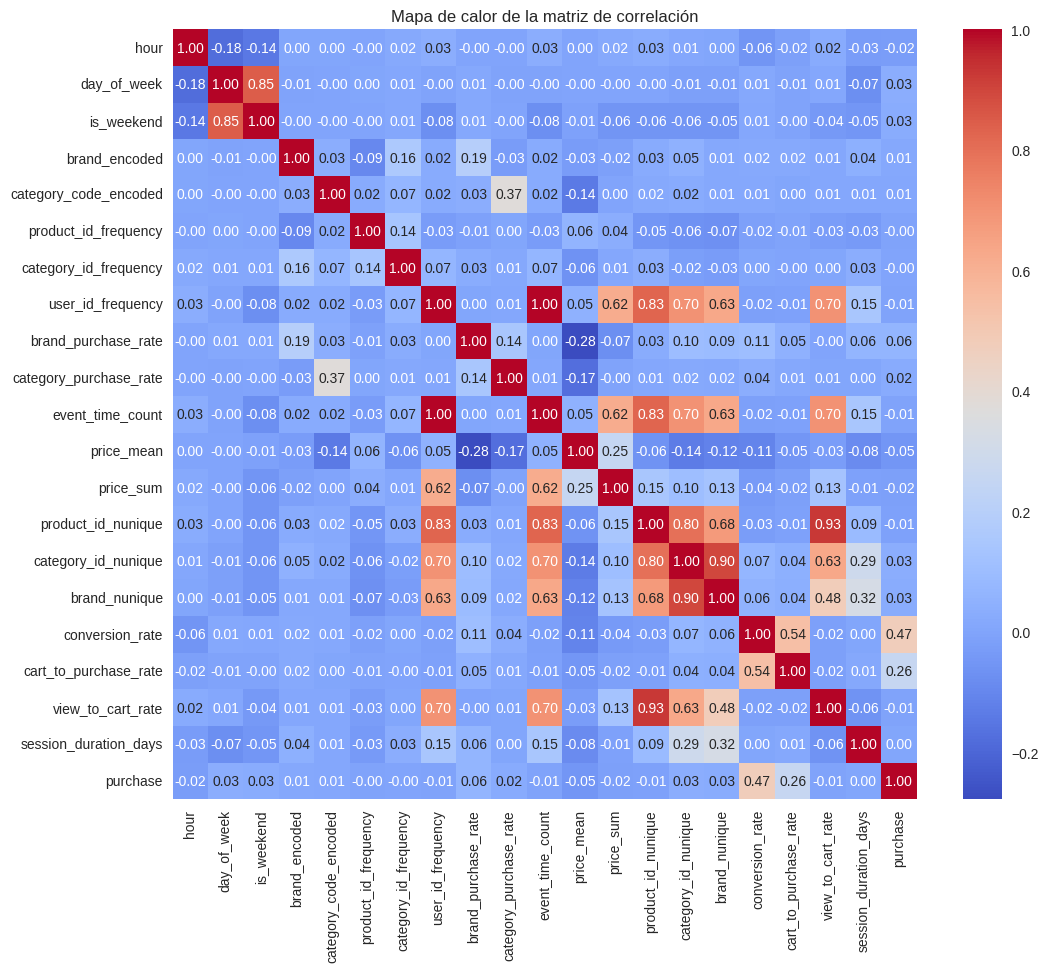

In [37]:
# matriz de correlación completa
plt.figure(figsize=(12, 10))  # Tamaño opcional del gráfico
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

In [38]:
processed_data.head()

,hour,day_of_week,is_weekend,brand_encoded,category_code_encoded,product_id_frequency,category_id_frequency,user_id_frequency,brand_purchase_rate,category_purchase_rate,...,price_mean,price_sum,product_id_nunique,category_id_nunique,brand_nunique,conversion_rate,cart_to_purchase_rate,view_to_cart_rate,session_duration_days,event_purchase
0,-2.50031,2,0,90,10,1.000000,0.405803,0.000000,0.057677,0.055373,...,5.2400,5.24,1,1,1,0.0,0.0,0.0,0.000000,False
1,-2.50031,2,0,118,10,0.001381,0.007360,0.000000,0.039460,0.055373,...,3.9700,3.97,1,1,1,0.0,0.0,0.0,0.000000,False
2,-2.50031,2,0,235,10,0.016797,0.019777,0.000929,0.070978,0.055373,...,3.9167,11.75,3,1,3,0.0,0.0,0.0,0.000856,False
3,-2.50031,2,0,222,10,0.000230,0.119665,0.006964,0.057612,0.055373,...,6.0100,96.16,15,5,5,0.0,0.0,0.0,3.464259,False
4,-2.50031,2,0,222,10,0.057984,0.094647,0.000000,0.057612,0.055373,...,3.9200,3.92,1,1,1,0.0,0.0,0.0,0.000000,False


### II D Selecciona de variables

In [39]:
# Convertir la variable objetivo a numérica si es necesaria
processed_data['event_purchase'] = processed_data['event_purchase'].astype(int)

# Separar features y target
X = processed_data.drop('event_purchase', axis=1)
y = processed_data['event_purchase']

print(f"Distribución de la variable objetivo:")
print(y.value_counts())

Distribución de la variable objetivo:
event_purchase
0    436592
1     25499
Name: count, dtype: int64


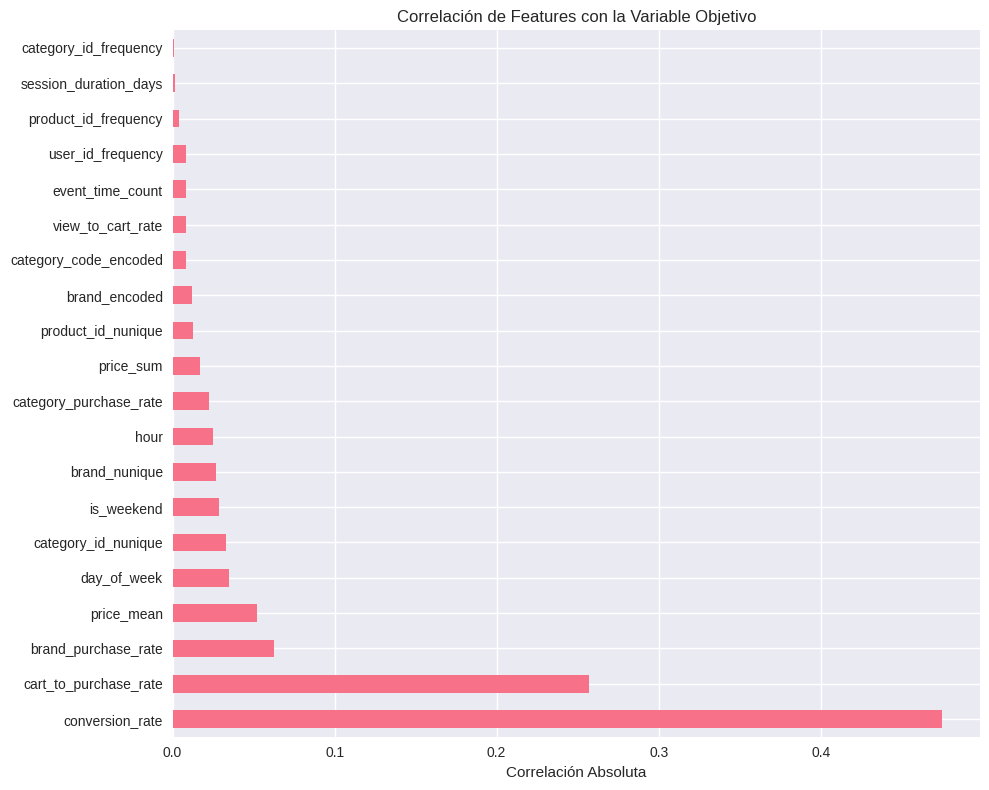

Features seleccionadas por correlación (>0.05): 4
['conversion_rate', 'cart_to_purchase_rate', 'brand_purchase_rate', 'price_mean']


In [40]:
# Método 1: Análisis de correlación
def correlation_analysis(X, y, threshold=0.1):
    """Análisis de correlación con la variable objetivo"""
    correlations = X.corrwith(y).abs().sort_values(ascending=False)

    plt.figure(figsize=(10, 8))
    correlations.plot(kind='barh')
    plt.title('Correlación de Features con la Variable Objetivo')
    plt.xlabel('Correlación Absoluta')
    plt.tight_layout()
    plt.show()

    selected_features = correlations[correlations > threshold].index.tolist()
    print(f"Features seleccionadas por correlación (>{threshold}): {len(selected_features)}")
    print(selected_features)

    return selected_features

correlation_features_a = correlation_analysis(X, y, threshold=0.05)


In [41]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE

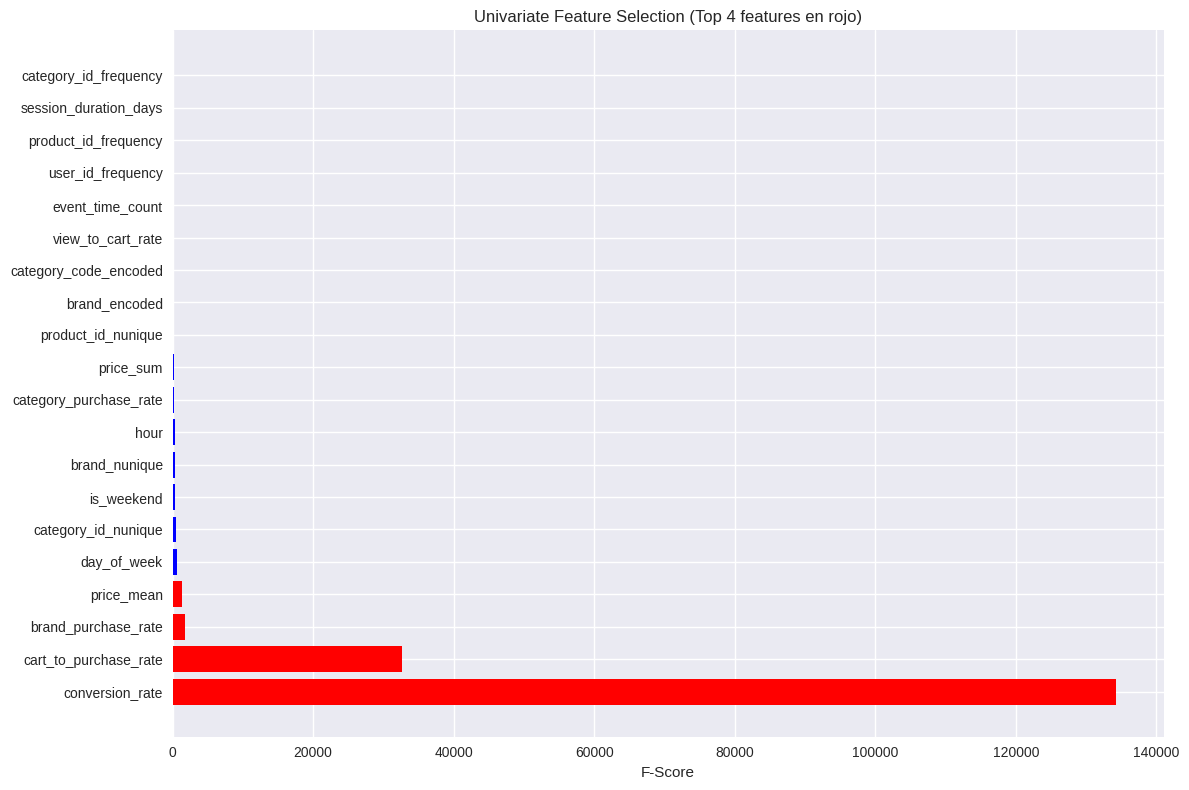

Features seleccionadas por SelectKBest: 4
['brand_purchase_rate', 'price_mean', 'conversion_rate', 'cart_to_purchase_rate']


In [42]:
# Método 2: SelectKBest con f_regression
def univariate_selection(X, y, k=10):
    """Selección univariada de features"""
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)

    # Obtener nombres de features seleccionadas
    selected_features = X.columns[selector.get_support()].tolist()
    scores = selector.scores_

    # Visualizar scores
    feature_scores = pd.DataFrame({
        'Feature': X.columns,
        'Score': scores,
        'Selected': selector.get_support()
    }).sort_values('Score', ascending=False)

    plt.figure(figsize=(12, 8))
    colors = ['red' if selected else 'blue' for selected in feature_scores['Selected']]
    plt.barh(range(len(feature_scores)), feature_scores['Score'], color=colors)
    plt.yticks(range(len(feature_scores)), feature_scores['Feature'])
    plt.xlabel('F-Score')
    plt.title(f'Univariate Feature Selection (Top {k} features en rojo)')
    plt.tight_layout()
    plt.show()

    print(f"Features seleccionadas por SelectKBest: {len(selected_features)}")
    print(selected_features)

    return selected_features, feature_scores

univariate_features_b, feature_scores_b = univariate_selection(X, y, k=4)

In [43]:
from sklearn.decomposition import PCA

Número de componentes para 95.0% de varianza: 4


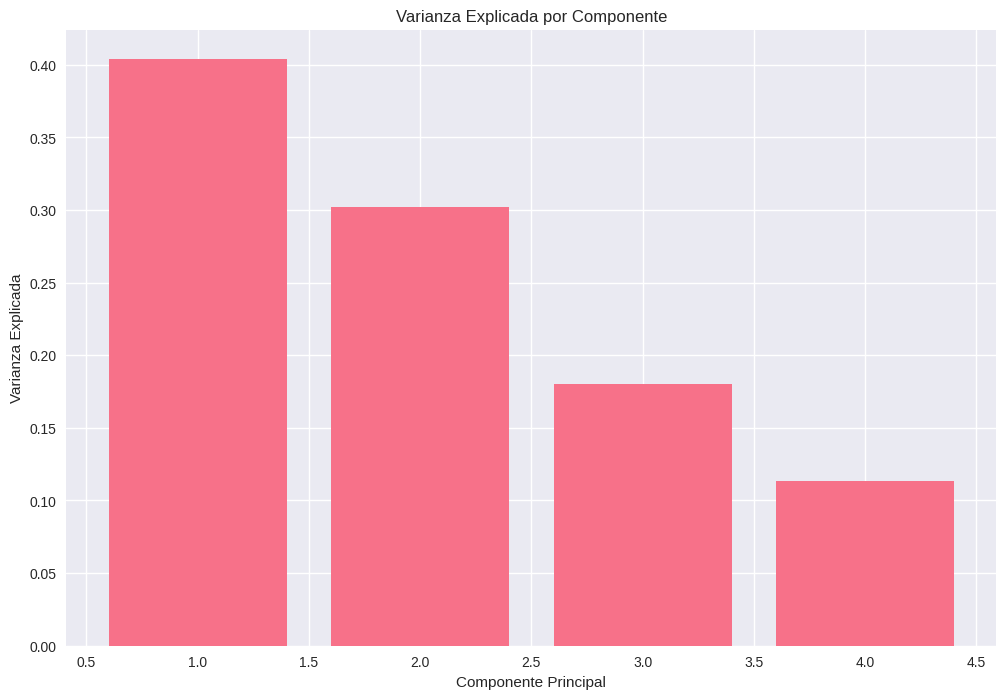

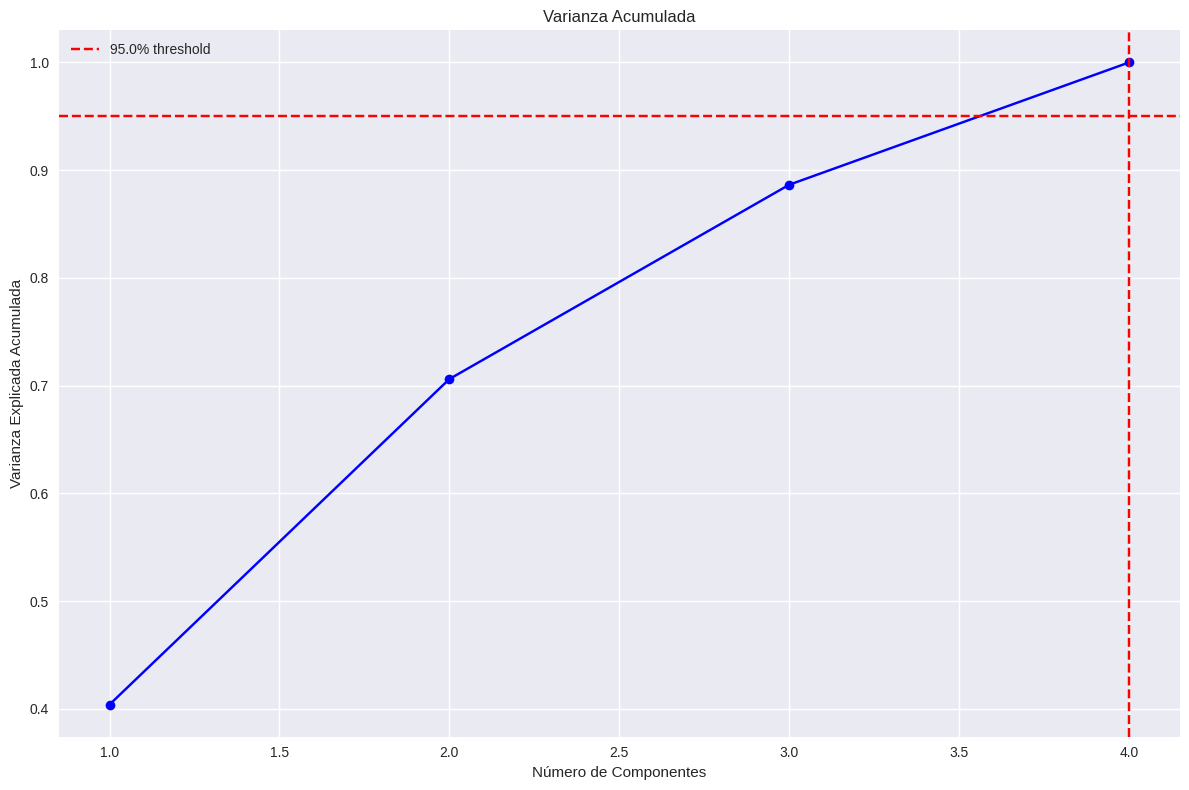

In [44]:
final_selected_features = univariate_features_b
# Preparar datos para PCA
X_selected = X[final_selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Aplicar PCA
def apply_pca_analysis(X_scaled, feature_names, variance_threshold=0.95):
    """Aplicar PCA y analizar componentes principales"""

    # PCA completo para análisis
    pca_full = PCA()
    X_pca_full = pca_full.fit_transform(X_scaled)

    # Varianza explicada
    explained_variance = pca_full.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Encontrar número de componentes para el threshold
    n_components = np.argmax(cumulative_variance >= variance_threshold) + 1

    print(f"Número de componentes para {variance_threshold*100}% de varianza: {n_components}")


    # Gráfico 1: Varianza por componente
    plt.figure()
    plt.bar(range(1, len(explained_variance) + 1), explained_variance)
    plt.xlabel('Componente Principal')
    plt.ylabel('Varianza Explicada')
    plt.title('Varianza Explicada por Componente')

    # Gráfico 2: Varianza acumulada
    plt.figure()
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
    plt.axhline(y=variance_threshold, color='r', linestyle='--',
                label=f'{variance_threshold*100}% threshold')
    plt.axvline(x=n_components, color='r', linestyle='--')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Varianza Explicada Acumulada')
    plt.title('Varianza Acumulada')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return n_components, pca_full

n_components_95, pca_full = apply_pca_analysis(X_scaled, final_selected_features)

In [45]:
n_components_95

np.int64(4)

In [46]:
pca_full.explained_variance_ratio_

array([0.4039406 , 0.30216566, 0.18036897, 0.11352477])

In [47]:
final_selected_features

['brand_purchase_rate',
 'price_mean',
 'conversion_rate',
 'cart_to_purchase_rate']

Componentes Principales (Loadings):
                         PC1    PC2    PC3    PC4
brand_purchase_rate    0.298  0.640  0.706 -0.052
price_mean            -0.304 -0.635  0.708  0.052
conversion_rate        0.655 -0.251  0.004  0.713
cart_to_purchase_rate  0.624 -0.352  0.004 -0.698


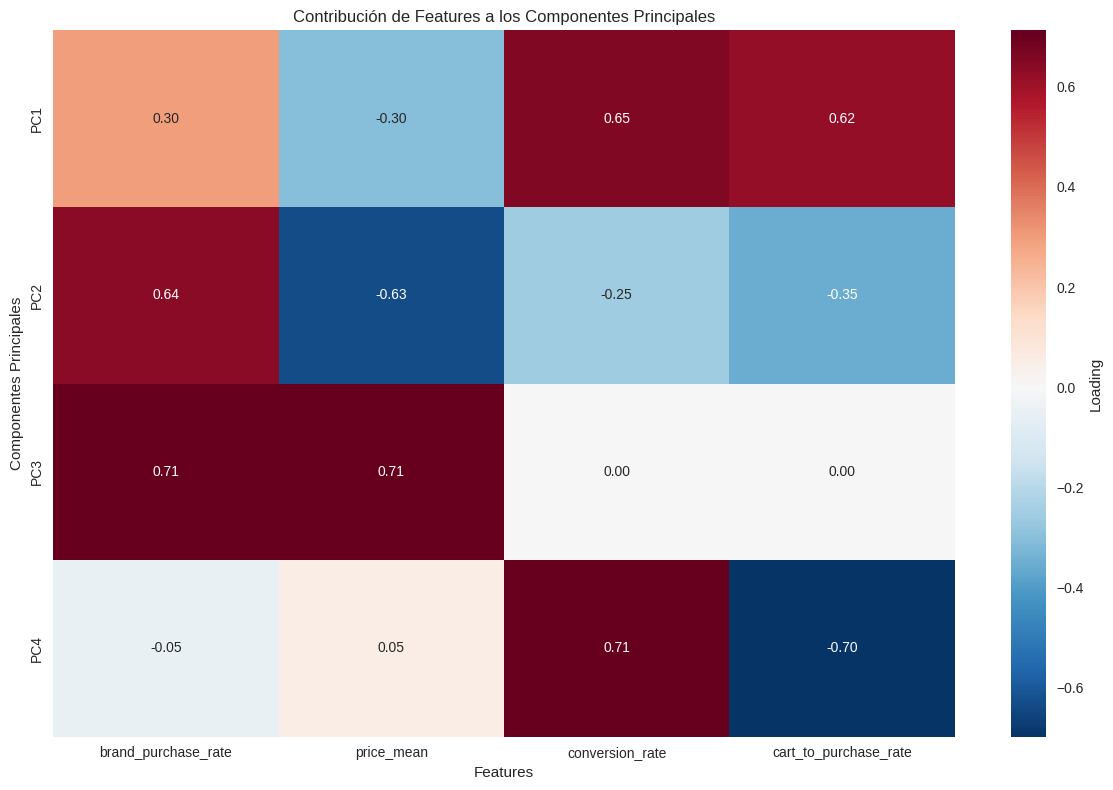

In [48]:
# Análisis de componentes principales
def analyze_pca_components(pca_full, feature_names, n_components=5):
    """Analizar la contribución de features a los componentes principales"""

    components_df = pd.DataFrame(
        pca_full.components_[:n_components].T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=feature_names
    )

    print("Componentes Principales (Loadings):")
    print(components_df.round(3))

    # Heatmap de componentes
    plt.figure(figsize=(12, 8))
    sns.heatmap(components_df.T, annot=True, cmap='RdBu_r', center=0,
                fmt='.2f', cbar_kws={'label': 'Loading'})
    plt.title('Contribución de Features a los Componentes Principales')
    plt.xlabel('Features')
    plt.ylabel('Componentes Principales')
    plt.tight_layout()
    plt.show()



analyze_pca_components(pca_full, final_selected_features, n_components_95)

In [49]:
# Aplicar PCA final con el número óptimo de componentes
def apply_final_pca(X_scaled, n_components):
    """Aplicar PCA con el número óptimo de componentes"""
    pca_final = PCA(n_components=n_components)
    X_pca = pca_final.fit_transform(X_scaled)

    print(f"Dimensiones originales: {X_scaled.shape}")
    print(f"Dimensiones después de PCA: {X_pca.shape}")
    print(f"Varianza explicada total: {pca_final.explained_variance_ratio_.sum():.4f}")

    return X_pca, pca_final

# Comparar diferentes números de componentes
component_options = [len(final_selected_features)]
pca_results = {}

for n_comp in component_options:
    if n_comp <= len(final_selected_features):
        X_pca, pca_model = apply_final_pca(X_scaled, n_comp)
        variance_explained = pca_model.explained_variance_ratio_.sum()
        pca_results[n_comp] = {
            'X_pca': X_pca,
            'pca_model': pca_model,
            'variance_explained': variance_explained
        }
        print(f"PCA con {n_comp} componentes: {variance_explained:.4f} varianza explicada\n")

Dimensiones originales: (462091, 4)
Dimensiones después de PCA: (462091, 4)
Varianza explicada total: 1.0000
PCA con 4 componentes: 1.0000 varianza explicada



In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Seleccionar el mejor PCA


best_n_components = 4
X_final = pca_results[best_n_components]['X_pca']
pca_final_model = pca_results[best_n_components]['pca_model']

print(f"Configuración final:")
print(f"Features originales: {X.shape[1]}")
print(f"Features después de selección: {len(final_selected_features)}")
print(f"Componentes PCA: {best_n_components}")
print(f"Varianza explicada: {pca_results[best_n_components]['variance_explained']:.4f}")

# División en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(
#     X_final, y, test_size=0.2, random_state=42, stratify=y
# )

# Dividir en entrenamiento + validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# Dividir entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)

print(f"\nConjuntos de datos:")
print(f"Entrenamiento: {X_train.shape}")
print(f"Prueba: {X_test.shape}")
print(f"Distribución y_train: {np.bincount(y_train)}")
print(f"Distribución y_test: {np.bincount(y_test)}")

Configuración final:
Features originales: 20
Features después de selección: 4
Componentes PCA: 4
Varianza explicada: 1.0000

Conjuntos de datos:
Entrenamiento: (295737, 4)
Prueba: (92419, 4)
Distribución y_train: [279418  16319]
Distribución y_test: [87319  5100]


In [52]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError, MeanAbsolutePercentageError

In [62]:
# Construir la red neuronal

del model
model = Sequential()

model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    #metrics=['accuracy', 'precision', 'recall']
    metrics=[MeanAbsoluteError(), MeanSquaredError()]
)

print(model.summary())



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 96 (384.00 B)

None


In [63]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
9242/9242 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.2057 - mean_absolute_error: 0.1330 - mean_squared_error: 0.0627 - val_loss: 0.1328 - val_mean_absolute_error: 0.0755 - val_mean_squared_error: 0.0414
Epoch 2/50
9242/9242 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.1343 - mean_absolute_error: 0.0824 - mean_squared_error: 0.0416 - val_loss: 0.1293 - val_mean_absolute_error: 0.0804 - val_mean_squared_error: 0.0403
Epoch 3/50
9242/9242 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.1354 - mean_absolute_error: 0.0839 - mean_squared_error: 0.0422 - val_loss: 0.1304 - val_mean_absolute_error: 0.0767 - val_mean_squared_error: 0.0407
Epoch 4/50
9242/9242 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.1327 - mean_absolute_error: 0.0819 - mean_squared_error: 0.0412 - val_loss: 0.1309 - val_mean_absolute_error: 0.0750 - val_mean_squared_error: 0.0408
Epoch 5/50
9242/9242 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.1333 - mean_absolute_error: 0.0825 - mean_squared_error: 0.0415 - val_loss:

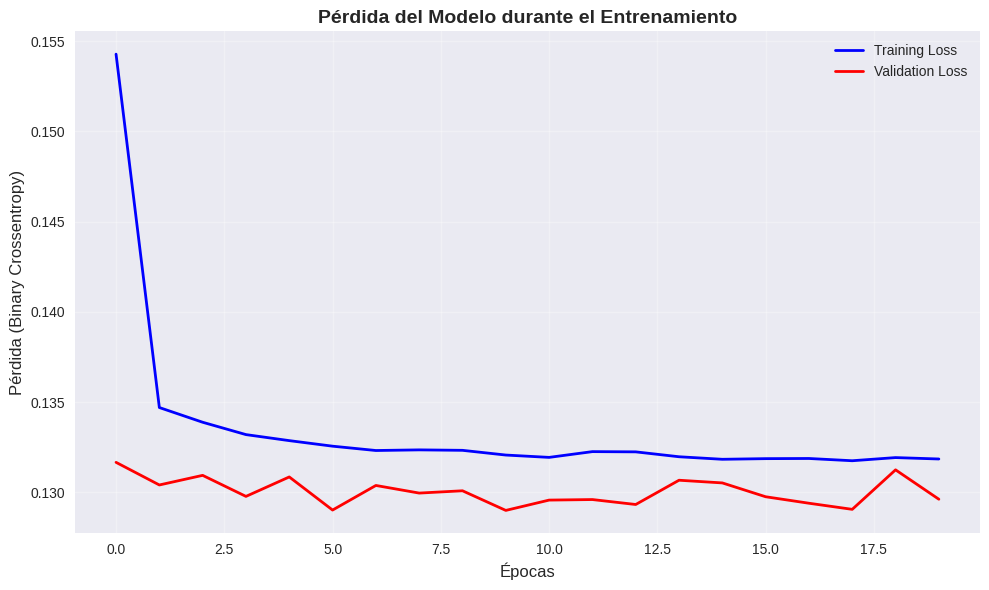

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
plt.title('Pérdida del Modelo durante el Entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida (Binary Crossentropy)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

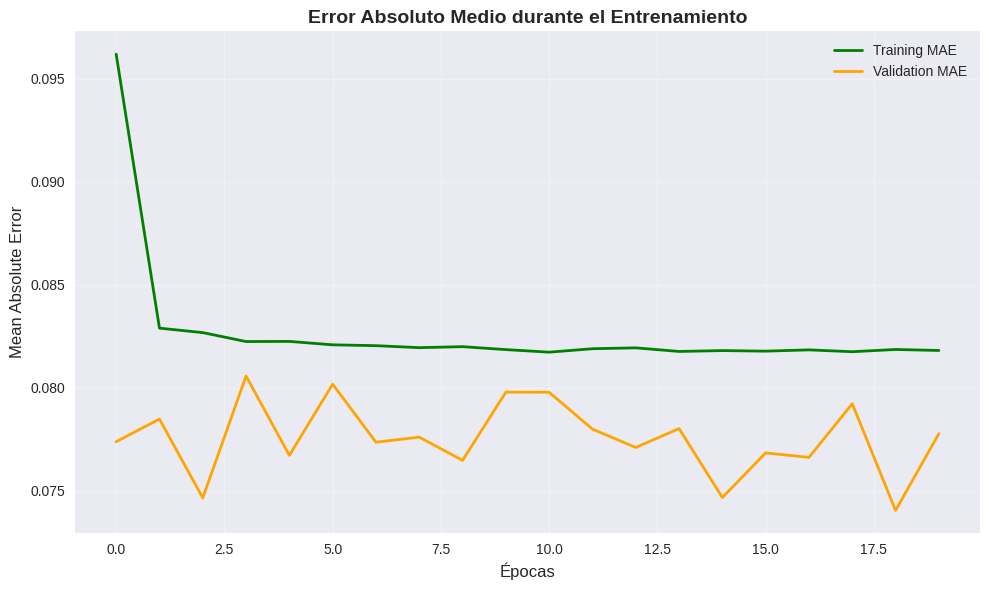

In [57]:
# 2. Gráfica de Mean Absolute Error (MAE)
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE', color='green', linewidth=2)
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE', color='orange', linewidth=2)
plt.title('Error Absoluto Medio durante el Entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Mean Absolute Error', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

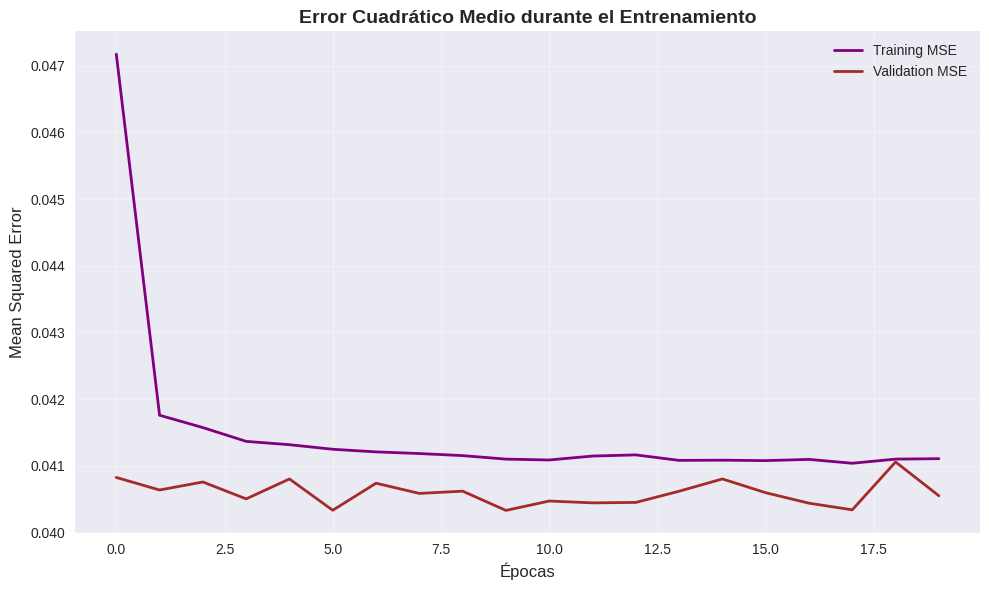

In [58]:
# 3. Gráfica de Mean Squared Error (MSE)
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_squared_error'], label='Training MSE', color='purple', linewidth=2)
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE', color='brown', linewidth=2)
plt.title('Error Cuadrático Medio durante el Entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

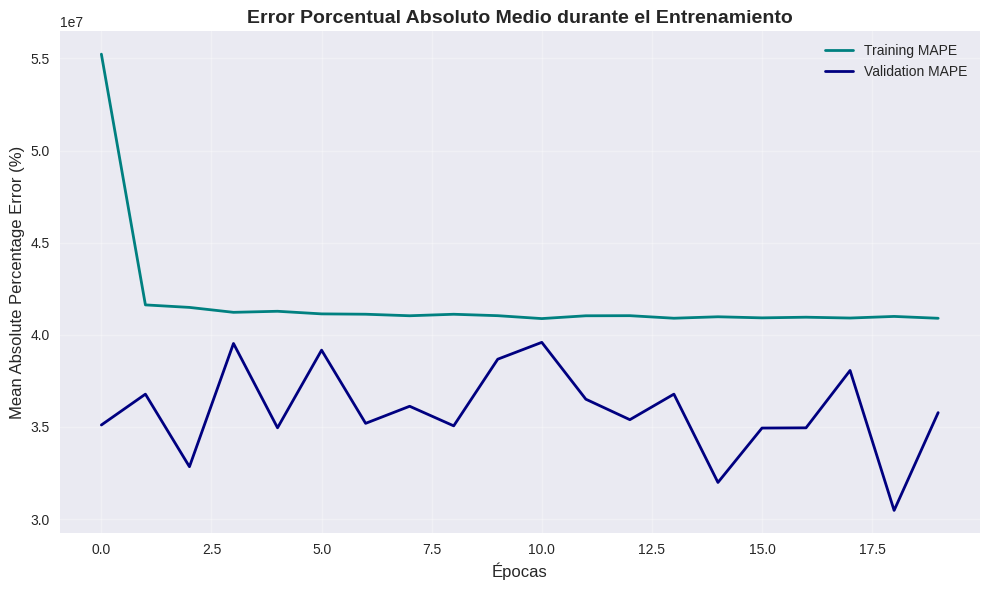

In [59]:
# 4. Gráfica de Mean Absolute Percentage Error (MAPE)
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_absolute_percentage_error'], label='Training MAPE', color='teal', linewidth=2)
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE', color='navy', linewidth=2)
plt.title('Error Porcentual Absoluto Medio durante el Entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Mean Absolute Percentage Error (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


9242/9242 ━━━━━━━━━━━━━━━━━━━━ 8s 838us/step
2311/2311 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step


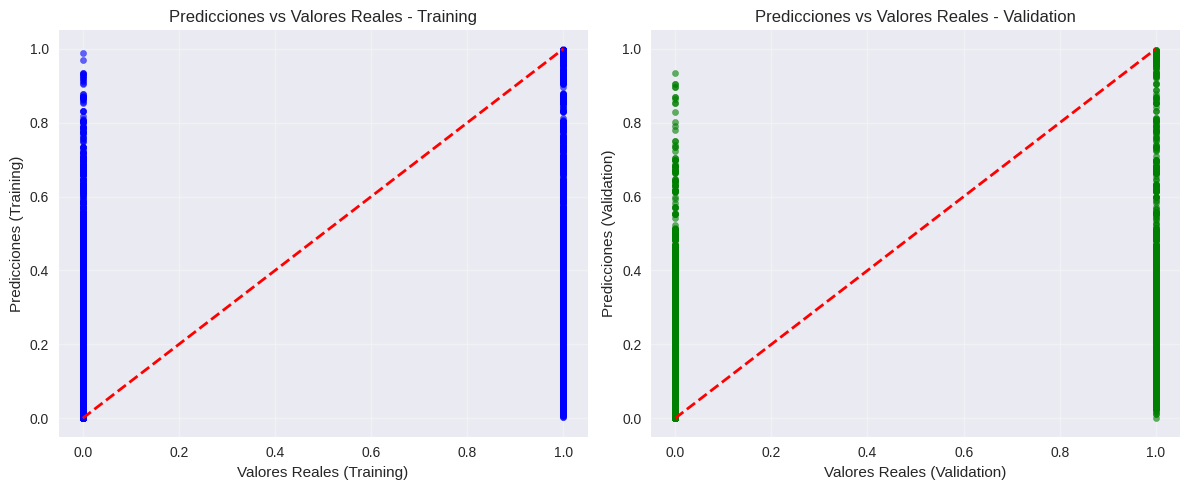

In [60]:
# 6. Hacer predicciones y visualizar resultados
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Gráfica de predicciones vs valores reales - Training
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue', s=20)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Valores Reales (Training)')
plt.ylabel('Predicciones (Training)')
plt.title('Predicciones vs Valores Reales - Training')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_val, y_pred_val, alpha=0.6, color='green', s=20)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Valores Reales (Validation)')
plt.ylabel('Predicciones (Validation)')
plt.title('Predicciones vs Valores Reales - Validation')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [69]:
# 8. Mostrar métricas finales
print("=" * 50)
print("MÉTRICAS FINALES DEL MODELO")
print("=" * 50)
print(f"Épocas entrenadas: {len(history.history['loss'])}")
print(f"Pérdida final (Training): {history.history['loss'][-1]:.4f}")
print(f"Pérdida final (Validation): {history.history['val_loss'][-1]:.4f}")
print(f"MAE final (Training): {history.history['mean_absolute_error'][-1]:.4f}")
print(f"MAE final (Validation): {history.history['val_mean_absolute_error'][-1]:.4f}")
print(f"MSE final (Training): {history.history['mean_squared_error'][-1]:.4f}")
print(f"MSE final (Validation): {history.history['val_mean_squared_error'][-1]:.4f}")
print("=" * 50)

MÉTRICAS FINALES DEL MODELO
Épocas entrenadas: 17
Pérdida final (Training): 0.1317
Pérdida final (Validation): 0.1290
MAE final (Training): 0.0817
MAE final (Validation): 0.0791
MSE final (Training): 0.0410
MSE final (Validation): 0.0403
